In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import time
import copy
import warnings
warnings.filterwarnings("ignore")

In [17]:
data = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv')

In [18]:
data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


#### <font size=8>Galance Data

In [19]:
cm = sns.light_palette("green", as_cmap=True)
data.head(10).style.background_gradient(cmap=cm)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.000000,0.000000,0.000000
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.000000,0.000000,0.000000
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.000000,0.000000,0.000000
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.000000,0.000000,0.000000
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.000000,0.000000,0.000000
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.000000,0.000000,0.000000
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000


#### <font size=8>Data Info

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [21]:
info = pd.DataFrame({"name": data.columns,
                     "non-nulls": len(data) - data.isnull().sum().values,
                     "nulls": data.isnull().sum().values,
                     "type": data.dtypes.values})

info.style.background_gradient(cmap=cm)

,name,non-nulls,nulls,type
0,SNo,306429,0,int64
1,ObservationDate,306429,0,object
2,Province/State,228326,78103,object
3,Country/Region,306429,0,object
4,Last Update,306429,0,object
5,Confirmed,306429,0,float64
6,Deaths,306429,0,float64
7,Recovered,306429,0,float64


#### <font size=8>Data Features Types

In [22]:
pd.DataFrame(data.dtypes.value_counts()).style.background_gradient(cmap=cm)

,count
object,4
float64,3
int64,1


#### <font size=8>Unique Features Of Data

In [23]:
pd.DataFrame(data.nunique()).style.background_gradient(cmap=cm)

,0
SNo,306429
ObservationDate,494
Province/State,736
Country/Region,229
Last Update,1905
Confirmed,107146
Deaths,20089
Recovered,74541


#### <font size=8>Count Of Missing Values

In [24]:
pd.DataFrame(data.isnull().sum()).style.background_gradient(cmap=cm)

,0
SNo,0
ObservationDate,0
Province/State,78103
Country/Region,0
Last Update,0
Confirmed,0
Deaths,0
Recovered,0


#### <font size=8>Statistical Data Analysis

In [25]:
data_copy = copy.copy(data)
le = LabelEncoder()
for column in data_copy.loc[:, data.dtypes == object]:
    data_copy[column] = le.fit_transform(data_copy[column])

pd.DataFrame(data_copy.describe().T).style.background_gradient(cmap=cm)

,count,mean,std,min,25%,50%,75%,max
SNo,306429.000000,153215.000000,88458.577156,1.000000,76608.000000,153215.000000,229822.000000,306429.000000
ObservationDate,306429.000000,270.381514,142.302820,0.000000,154.000000,289.000000,392.000000,493.000000
Province/State,306429.000000,462.278221,244.079954,0.000000,254.000000,489.000000,736.000000,736.000000
Country/Region,306429.000000,127.728577,64.218537,0.000000,77.000000,126.000000,178.000000,228.000000
Last Update,306429.000000,1822.897712,170.064223,0.000000,1842.000000,1842.000000,1842.000000,1904.000000
Confirmed,306429.000000,85670.911559,277551.604043,-302844.000000,1042.000000,10375.000000,50752.000000,5863138.000000
Deaths,306429.000000,2036.403268,6410.938048,-178.000000,13.000000,192.000000,1322.000000,112385.000000
Recovered,306429.000000,50420.286304,201512.447838,-854405.000000,11.000000,1751.000000,20270.000000,6399531.000000


In [26]:
cdr = data.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
cdr.style.background_gradient(cmap=cm)

,ObservationDate,Confirmed,Deaths,Recovered
0,01/01/2021,84092619.000000,1834675.000000,47313005.000000
1,01/02/2021,84718978.000000,1843108.000000,47614297.000000
2,01/03/2021,85251774.000000,1850449.000000,47882779.000000
3,01/04/2021,85805892.000000,1860598.000000,48173187.000000
4,01/05/2021,86546014.000000,1875953.000000,48488548.000000
5,01/06/2021,87329386.000000,1891006.000000,48801673.000000
6,01/07/2021,88210223.000000,1905926.000000,49125604.000000
7,01/08/2021,89013445.000000,1921092.000000,49422867.000000
8,01/09/2021,89774439.000000,1933877.000000,49753112.000000
9,01/10/2021,90363573.000000,1942225.000000,50023662.000000


In [27]:
country = data.groupby("Country/Region")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
country = country.sort_values(['Confirmed', 'Deaths', 'Recovered']).reset_index()
country.style.background_gradient(cmap=cm)

,index,Country/Region,Confirmed,Deaths,Recovered
0,43,China,0.000000,0.000000,0.000000
1,0,Azerbaijan,1.000000,0.000000,0.000000
2,37,Cape Verde,1.000000,0.000000,0.000000
3,41,Channel Islands,1.000000,0.000000,0.000000
4,59,East Timor,1.000000,0.000000,0.000000
5,152,North Ireland,1.000000,0.000000,0.000000
6,169,Republic of the Congo,1.000000,0.000000,0.000000
7,207,The Gambia,1.000000,0.000000,0.000000
8,1,"('St. Martin',)",2.000000,0.000000,0.000000
9,51,Curacao,2.000000,0.000000,0.000000


#### <font size=8>Data Correlation

<Axes: >

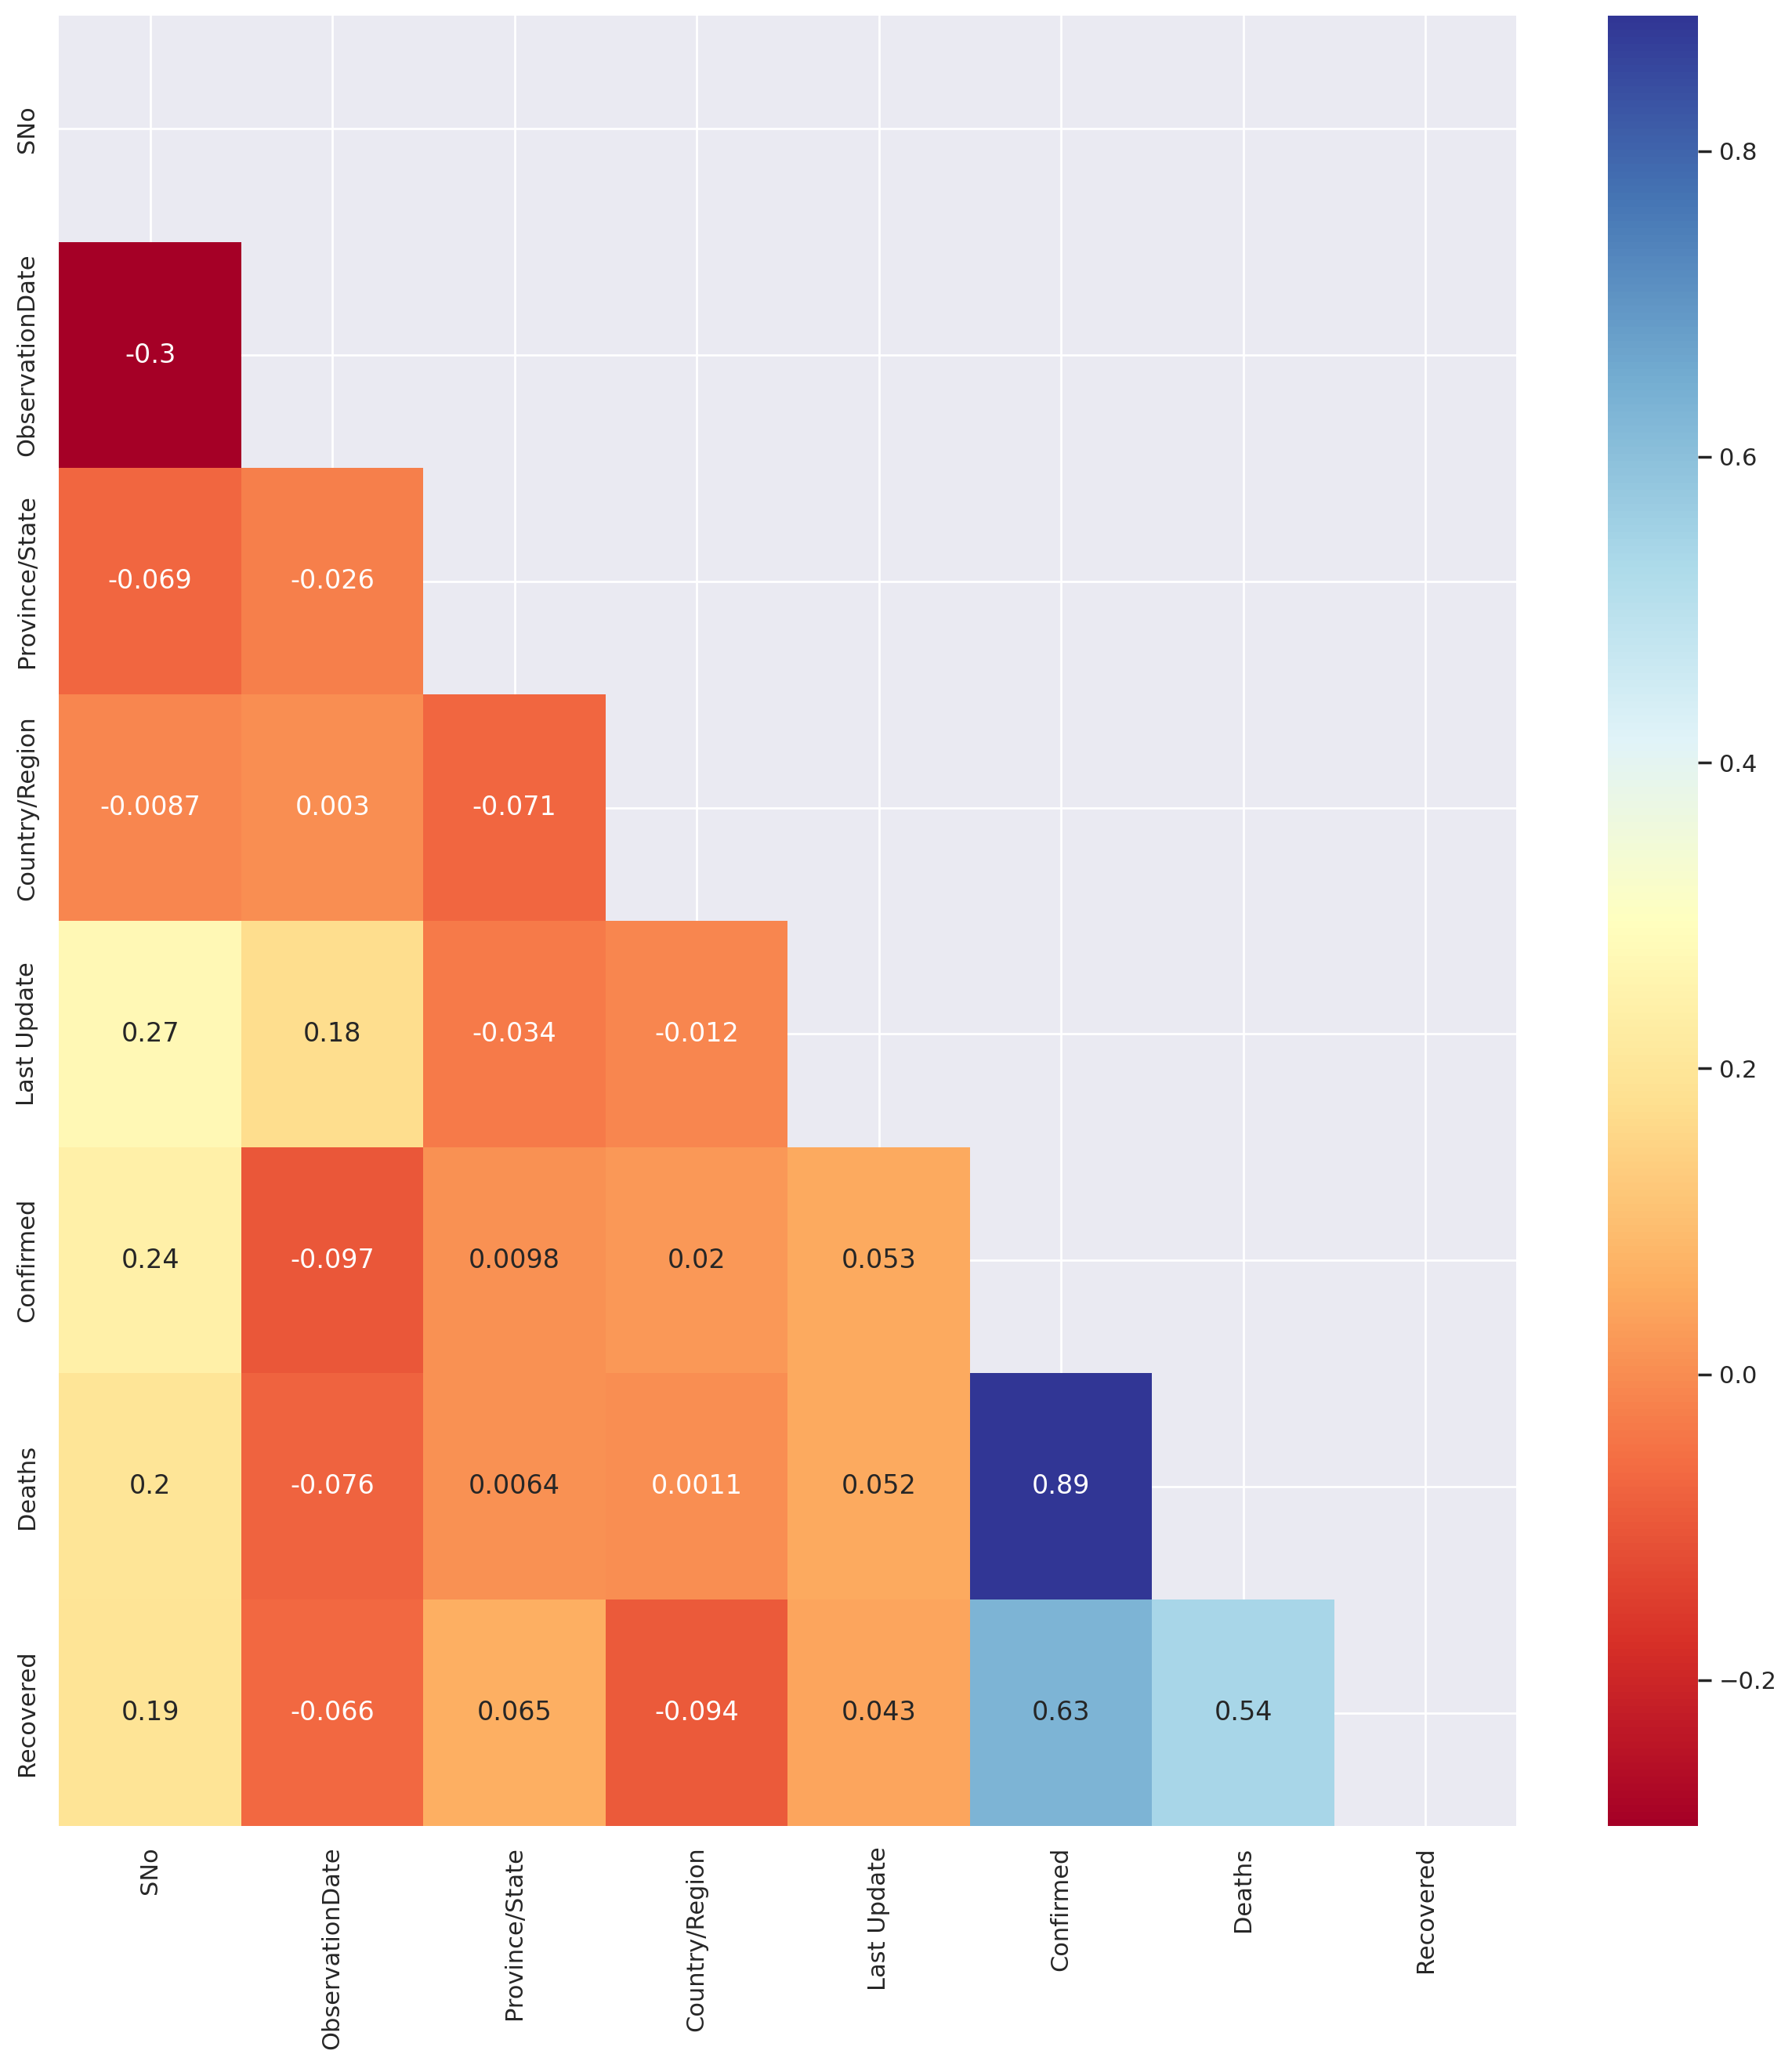

In [28]:
data_copy = copy.copy(data)
le = LabelEncoder()
for column in data_copy.loc[:, data.dtypes == object]:
    data_copy[column] = le.fit_transform(data_copy[column])

figure = plt.figure(figsize=(15, 15))
sns.heatmap(data_copy.corr(), cmap='RdYlBu', annot=True, mask=np.triu(data_copy.corr()))

<Axes: xlabel='Deaths', ylabel='Density'>

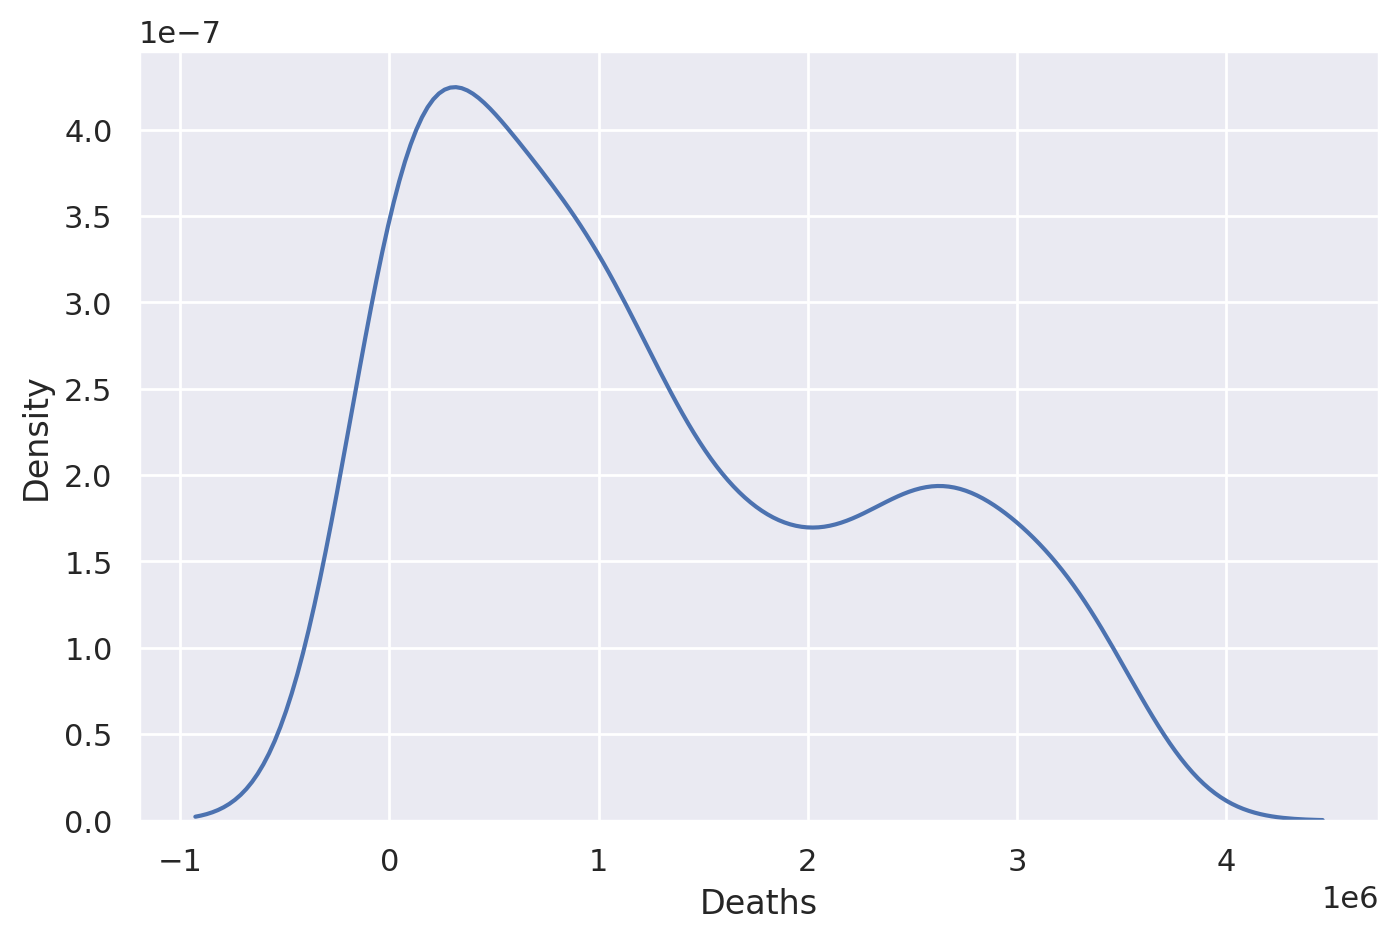

In [29]:
sns.kdeplot(data=cdr , x="Deaths", label="Deaths")

<Axes: xlabel='Confirmed', ylabel='Density'>

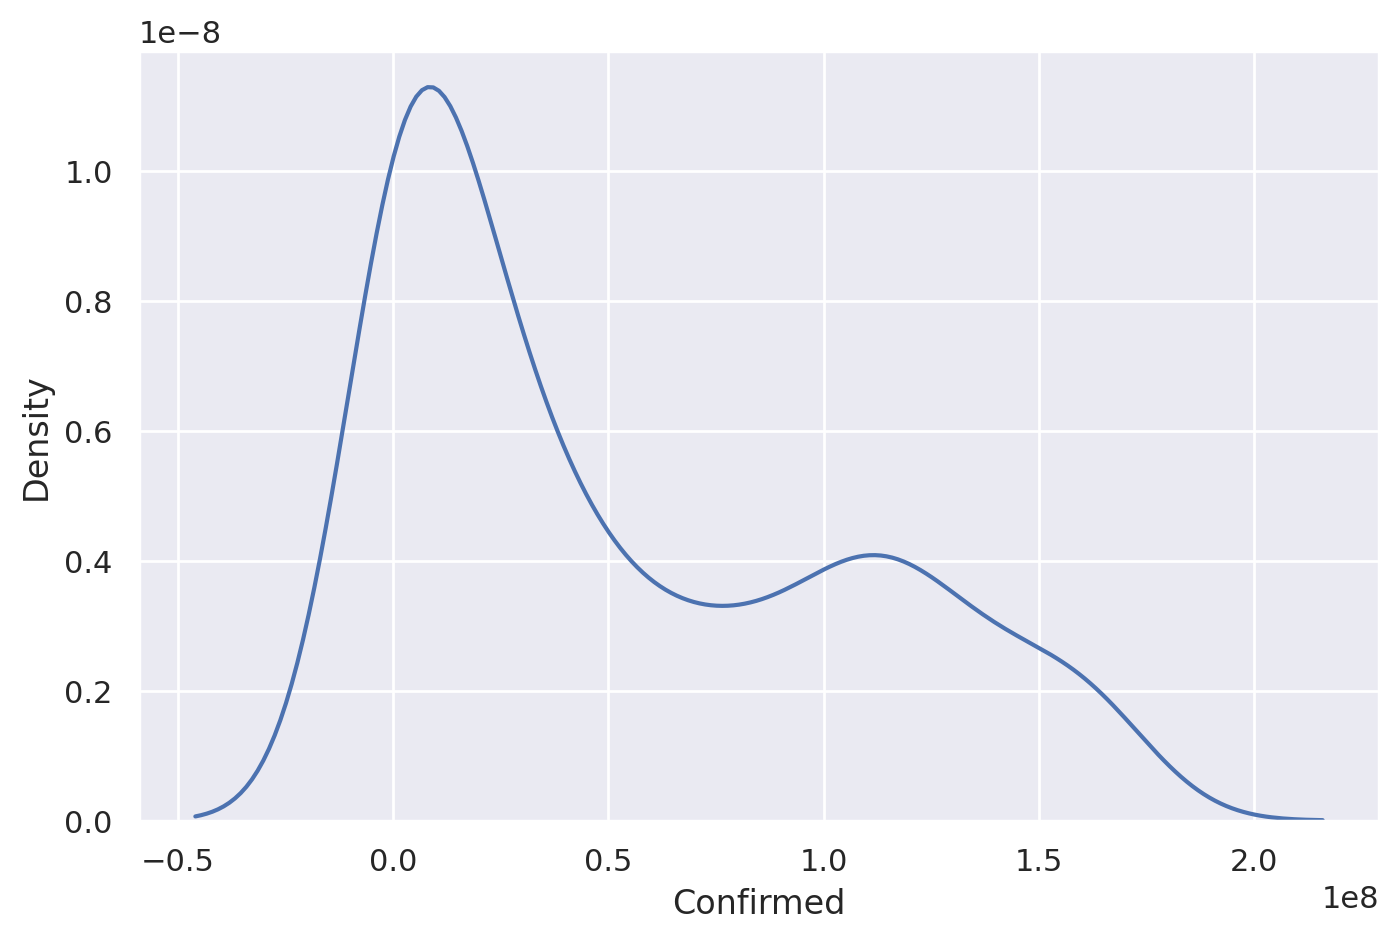

In [30]:
sns.kdeplot(data=cdr , x="Confirmed", label="Confirmed")

<Axes: xlabel='Country/Region', ylabel='Deaths'>

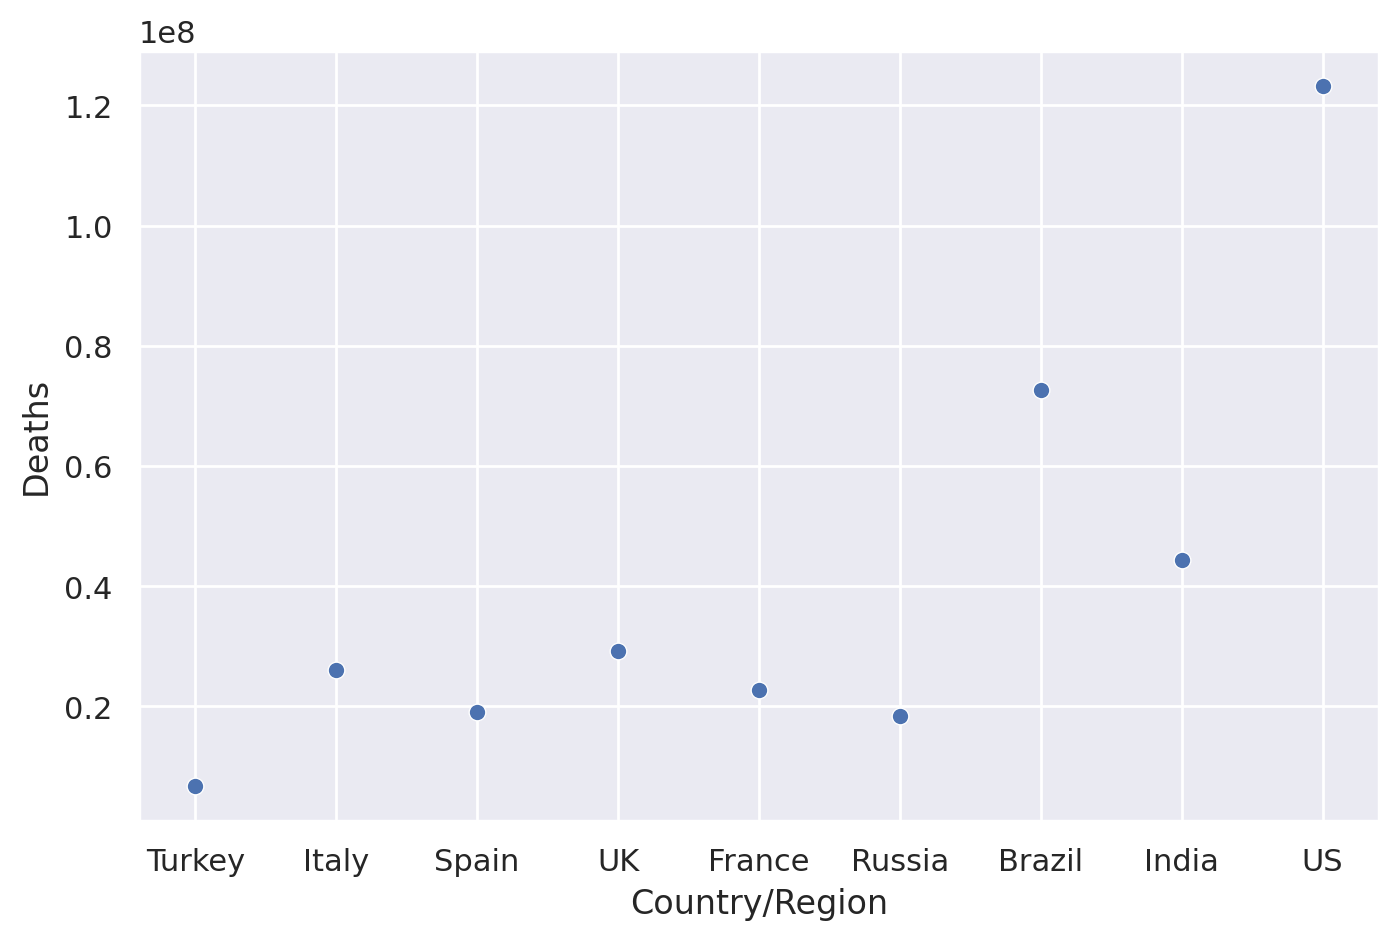

In [31]:
sns.scatterplot(data=country.loc[220:, :], x="Country/Region", y='Deaths') 

<Axes: xlabel='ObservationDate', ylabel='Deaths'>

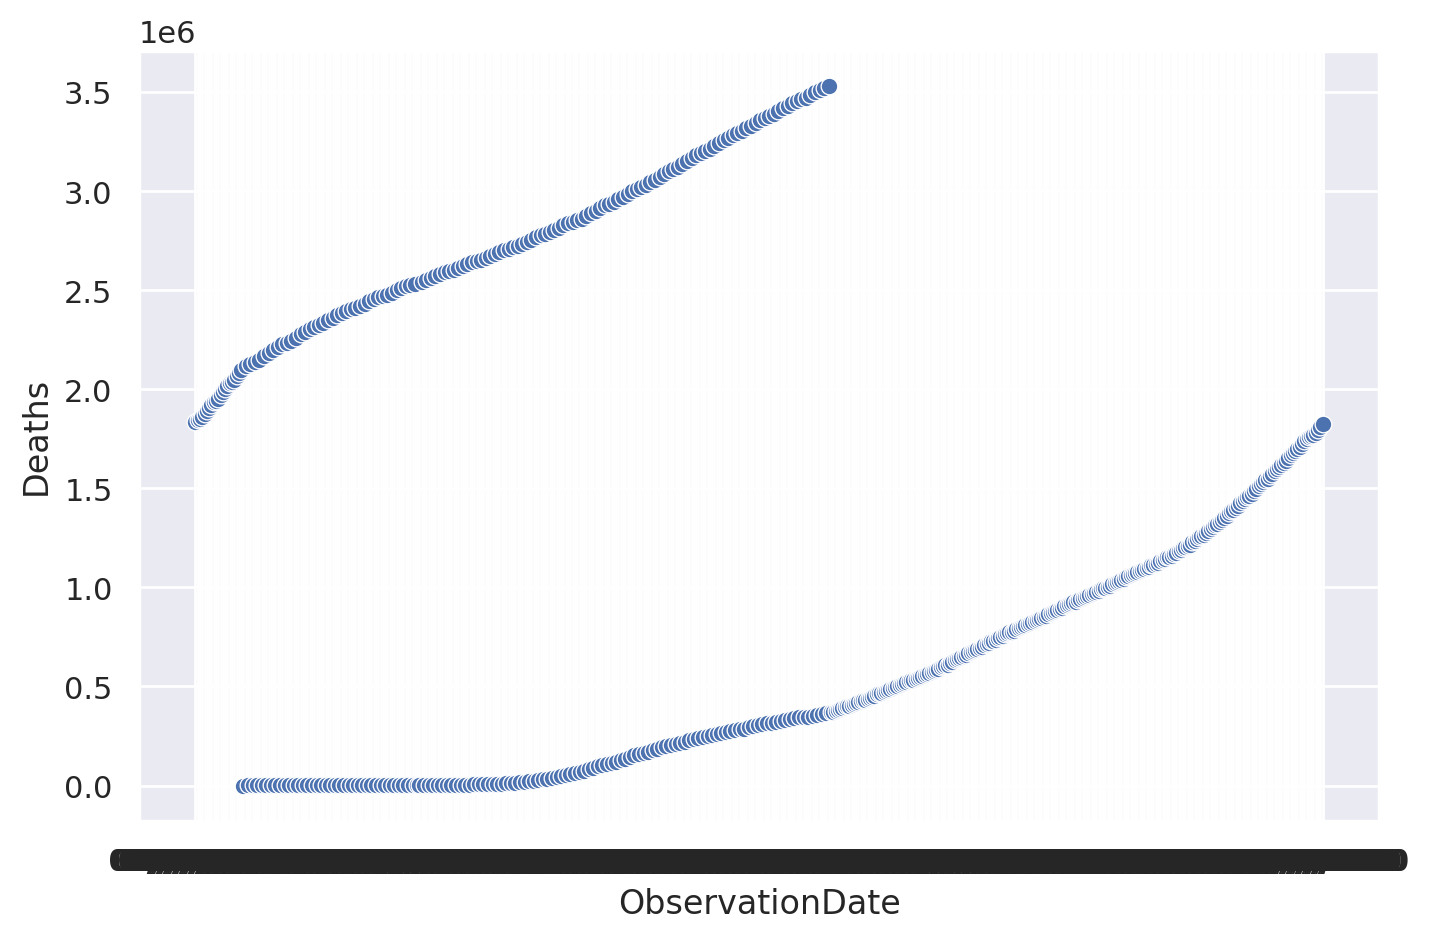

In [32]:
sns.scatterplot(data=cdr, x="ObservationDate", y='Deaths')

<Axes: xlabel='ObservationDate', ylabel='Confirmed'>

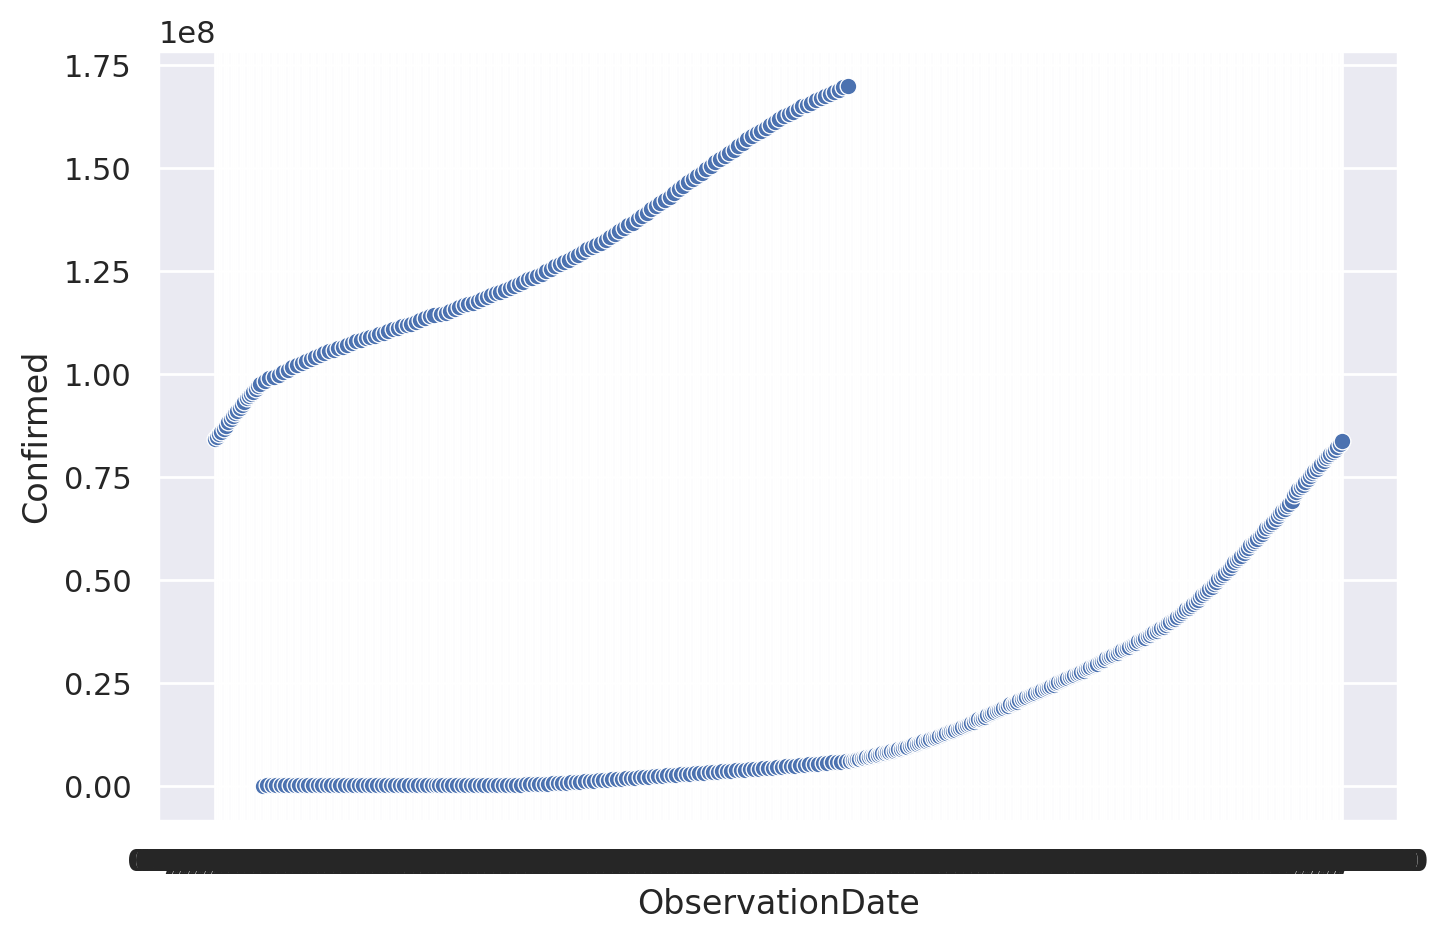

In [33]:
sns.scatterplot(data=cdr, x="ObservationDate", y='Confirmed')

<Axes: xlabel='ObservationDate', ylabel='Recovered'>

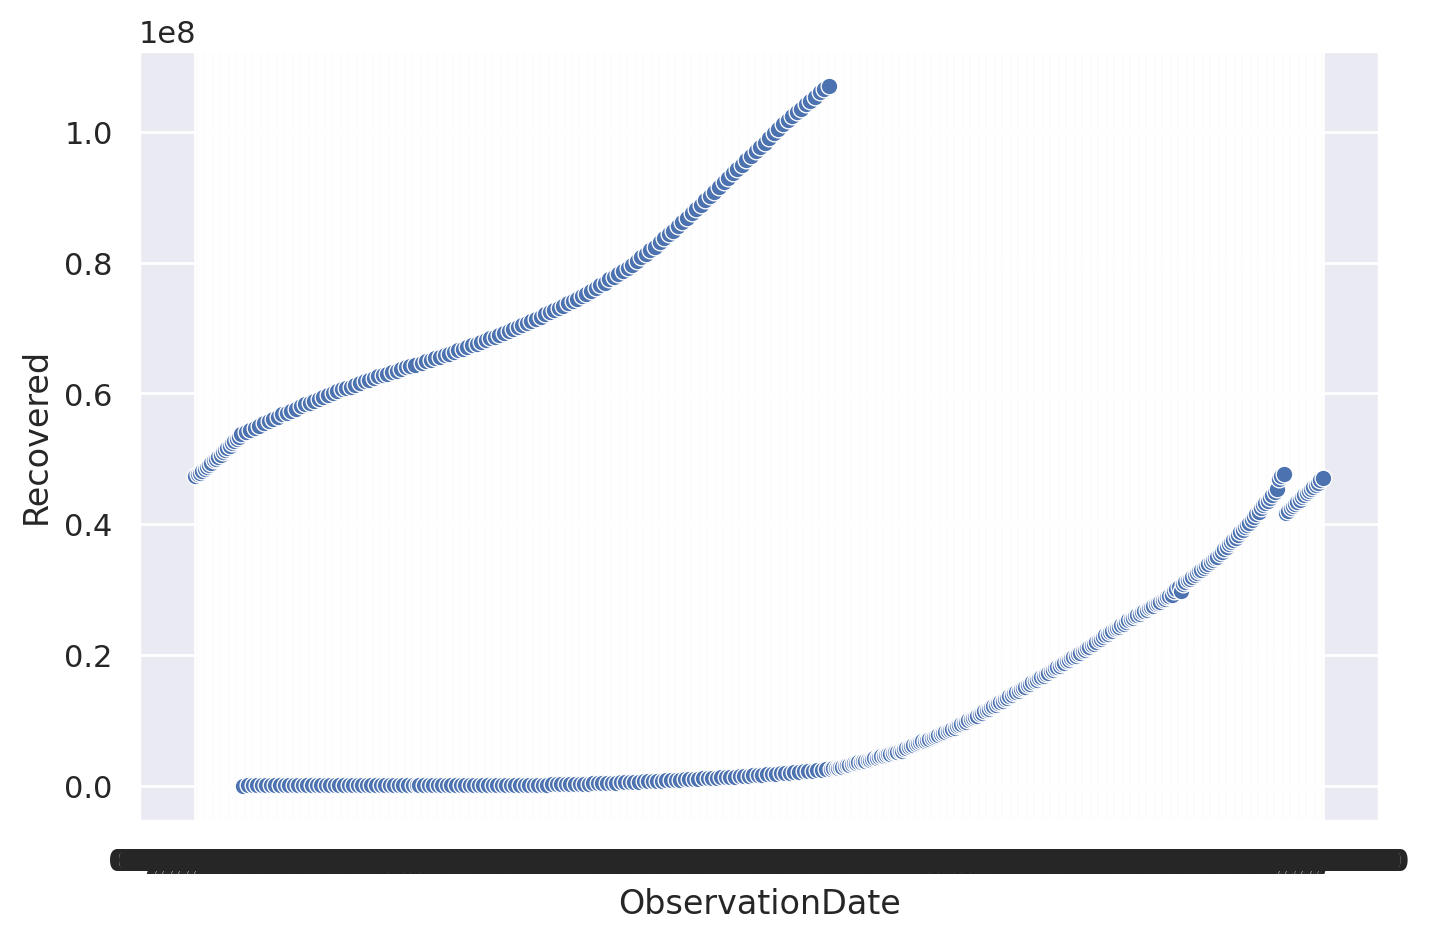

In [34]:
sns.scatterplot(data=cdr, x="ObservationDate", y='Recovered')